In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
print('\n')
print(accuracy_score(y_test, y_pred))

[[55  3]
 [ 1 21]]


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



0.95


In [9]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print("Accuracy = {:.2f} %".format(acc.mean()*100))
print("Standard Deviation = {:.2f} %".format(acc.std()*100))

Accuracy = 90.00 %
Standard Deviation = 4.15 %


In [10]:
errorRate = []
accuRate1 = []
accuRate2 = []
devRate = []

for i in range(1, 71):
    classifier_i = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    acc = cross_val_score(estimator = classifier_i, X = X_train, y = y_train, cv = 10)
    classifier_i.fit(X_train, y_train)
    y_pred_i = classifier_i.predict(X_test)
    errorRate.append(np.mean(y_pred_i != y_test))
    accuRate1.append(acc.mean())
    accuRate2.append(accuracy_score(y_test, y_pred_i))
    devRate.append(acc.std())

print(errorRate)
print('\n')
print(accuRate1)
print('\n')
print(accuRate2)
print('\n')
print(devRate)

[0.1125, 0.1125, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075]


[0.85, 0.85, 0.890625, 0.875, 0.903125, 0.890625, 0.909375, 0.896875, 0.90625, 0.89375, 0.896875, 0.890625, 0.89375, 0.896875, 0.9, 0.89375, 0.896875, 0.89375, 0.896875, 0.8875, 0.89375, 0.89375, 0.89375, 0.8875, 0.8875, 0.884375, 0.88125, 0.88125, 0.884375, 0.88125, 0.884375, 0.884375, 0.884375, 0.89375, 0.890625, 0.890625, 0.890625, 0.8875, 0.890625, 0.8875, 0.890625, 0.8875, 0.8875, 0.890625, 0.89375, 0.8875, 0.8875, 0.8875, 0.8875, 0.88125, 0.884375, 0.88125, 0.878125, 0.875, 0.871875, 0.86875, 0.865625, 0.86875, 0.871875, 0.8

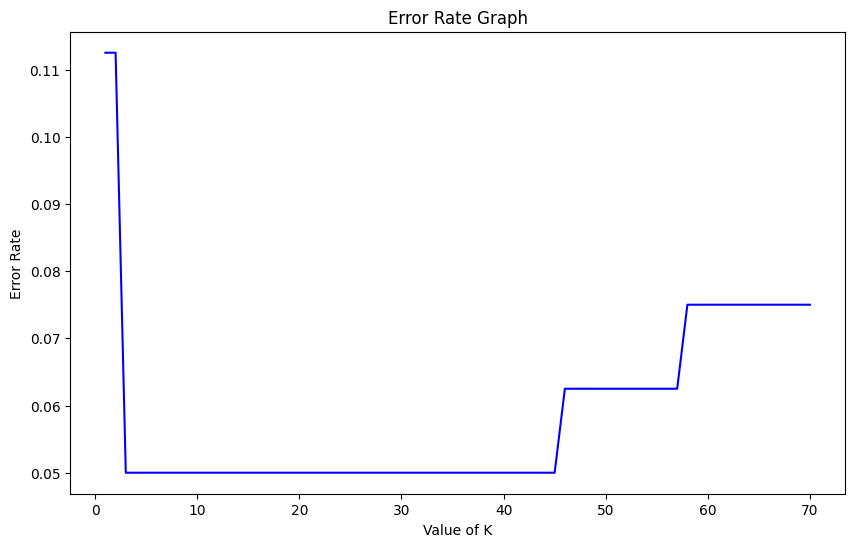

In [11]:
plt.figure(figsize = (10, 6))
plt.plot(range(1,71), errorRate, color = 'blue')
plt.title('Error Rate Graph')
plt.xlabel('Value of K')
plt.ylabel('Error Rate')
plt.show()

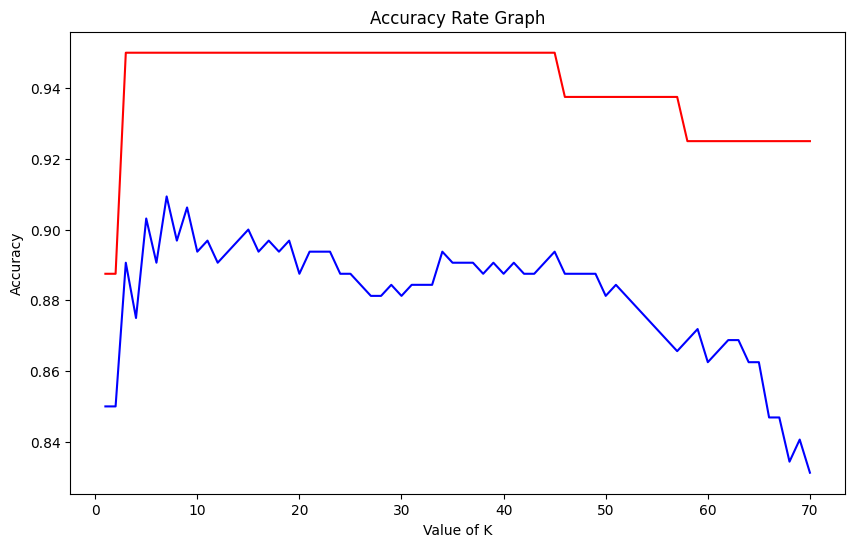

In [12]:
plt.figure(figsize = (10, 6))
plt.plot(range(1,71), accuRate1, color = 'blue')
plt.plot(range(1,71), accuRate2, color = 'red')
plt.title('Accuracy Rate Graph')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

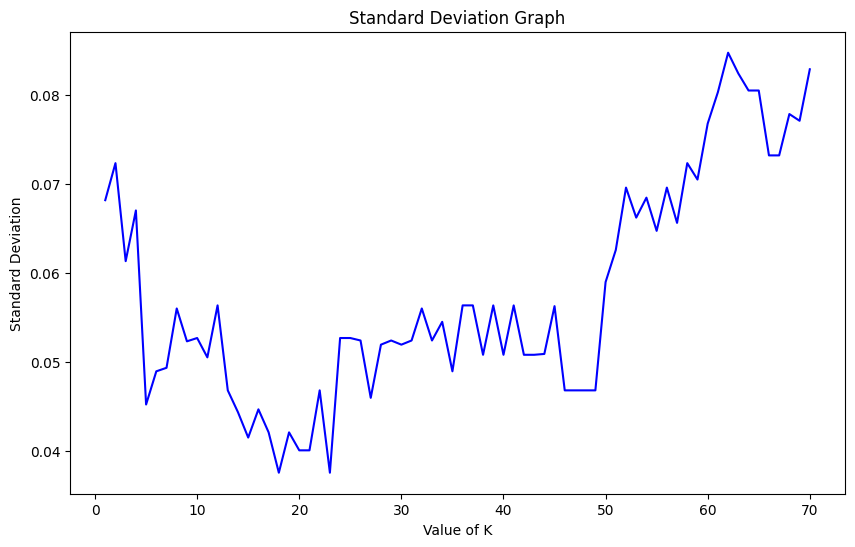

In [13]:
plt.figure(figsize = (10, 6))
plt.plot(range(1,71), devRate, color = 'blue')
plt.title('Standard Deviation Graph')
plt.xlabel('Value of K')
plt.ylabel('Standard Deviation')
plt.show()

# DONE!